<a href="https://colab.research.google.com/github/fernandovieira1/ML-e-DS-com-Python-de-A-a-Z/blob/master/parte1_classif_knn_census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## census

In [1]:
import os

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import pickle
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [6]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [7]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [8]:
knn_census = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # valores padrao: se nao passar naa, nao faz diferenca
knn_census.fit(x_census_treinamento, y_census_treinamento)

KNeighborsClassifier()

In [9]:
previsoes = knn_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [10]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [11]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8223132036847492

In [12]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      3693
        >50K       0.66      0.57      0.61      1192

    accuracy                           0.82      4885
   macro avg       0.76      0.74      0.75      4885
weighted avg       0.82      0.82      0.82      4885



0.8223132036847492

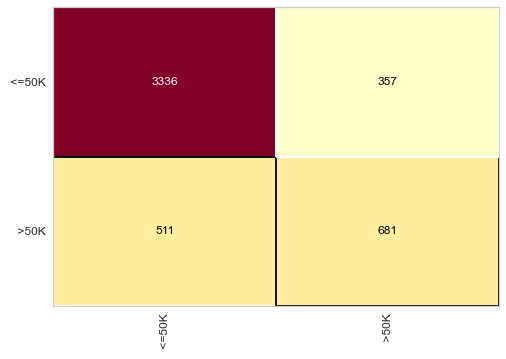

In [13]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)